# HW1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](https://www.safaribooksonline.com/library/view/mining-the-social/9781491973547/?orpq) 
* The codes for Chapters 1 and 9 are in [here](https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition/tree/master/notebooks).

** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

## Data Collection: Download Twitter Data using API

* As the first step of Data Science process, let's collect some twitter data. Choose a keyword and search tweets containing the keyword by using Twitter search API, and then download the searched tweets (including the meta data that the Search API returns) in a file. It is recommended that the number of searched tweets should be at least 300.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [1]:
# What keyword did you choose?:  <sonic>

In [17]:
import io, json
import prettytable
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from twitter import *
from textwrap import fill
from collections import Counter

In [6]:
CONSUMER_KEY = 'tVWZWJfKFv2s4qdJIOwjPBIwk'
CONSUMER_SECRET ='17B4xPaZJ5NNHwfXmnRAuVvmYkb8JnvfEXhXKGI3GuTWZ2tiTO'
OAUTH_TOKEN = '1190012319213867008-O8vhqrklw1Z1kTcchMa2t5X9Qhscch'
OAUTH_TOKEN_SECRET = 'nLyHDpan9zyCV5lTit4XKppm44QWUeW87jsHrQnl3om49'

t = Twitter(auth=OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET))
print(t)

In [7]:
# query for the first 100 results
search_results = t.search.tweets(q="sonic", count= '100')
statuses = search_results['statuses']
# use metadata to get next 200 results
for batch in range(2):
#     print(batch)
    next_results = search_results['search_metadata']['next_results']
        
    # Create a dictionary from next_results, with the form:
    # ?max_id=1124690280777699327&q=from%3Atwitterdev&count=2&include_entities=1&result_type=mixed
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split('&') ])
#     print(kwargs)
    search_results = t.search.tweets(**kwargs)
    statuses += search_results['statuses']

print(len(statuses))

300


In [8]:
print(statuses[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


In [9]:
index = 2
print(statuses[index]['id'])
print(statuses[index]['entities']['hashtags'])
statuses[index]['entities']['user_mentions']

1248000896363003905
[{'text': 'sonic', 'indices': [45, 51]}, {'text': 'SonicMovie', 'indices': [52, 63]}, {'text': 'sonicthehedghog', 'indices': [64, 80]}]


[{'screen_name': 'Reve_2Cha',
  'name': '🐾레브🐾',
  'id': 915556498100514816,
  'id_str': '915556498100514816',
  'indices': [3, 13]}]

In [10]:
# heavily inspired from Chapter 9, Page 362 from Mining the Social Web
# source: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
def save_json(data):
    with io.open('sonic-data.json', 'w', encoding='utf-8') as f:
        json.dump(data,f)
    
def load_json():
    with io.open('sonic-data.json', encoding='utf-8') as f:
        return json.load(f)

In [11]:
save_json(statuses)
a = load_json()
print(len(a))
print(a[0].keys())

300
dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


### Report  statistics about the tweets you collected 

In [ ]:
# The total number of tweets collected:  < 300>

'''
todo:
- remove duplicated or RT when doing most popular tweets
'''


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [18]:
# load json
results = load_json()
# dictionary that keeps track of frequency of words
words_collection = {}
# get number of tweets
number_tweets = len(results)

# populate dictionary
for tweet_index in range(number_tweets):
    for word in results[tweet_index]['text'].split():
        # if word not in dict then add, else increase count
        if word in words_collection.keys():
            words_collection[word] += 1
        else:
            words_collection[word] = 1

# sort dictionary based on frequency
sorted_results = {k: v for k, v in sorted(words_collection.items(), key=lambda item: item[1], reverse=True)}

# create pretty table
table = PrettyTable(field_names=['word','count'])
for index, word_count_pair in enumerate(sorted_results.items()):
    if index == 30:
        break
    table.add_row(word_count_pair)

print(table)


+-------------------+-------+
|        word       | count |
+-------------------+-------+
|         RT        |  164  |
|       Sonic       |  152  |
|        the        |  110  |
|         a         |   87  |
|        and        |   84  |
|         to        |   64  |
|       sonic       |   57  |
|         I         |   57  |
|         in        |   54  |
|         of        |   49  |
|        for        |   48  |
|         is        |   37  |
|         as        |   28  |
|        was        |   27  |
|         i         |   26  |
| @dailyretrosonic: |   24  |
|        that       |   23  |
|        The        |   23  |
|    #SonicMovie    |   20  |
|         on        |   20  |
|        this       |   19  |
|         do        |   19  |
|        from       |   19  |
|         :D        |   18  |
|       #sonic      |   18  |
|        you        |   18  |
|         my        |   18  |
|       Cherry      |   17  |
|      blossoms     |   17  |
|  #sonicthehedghog |   17  |
+---------

** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [31]:
# list that keeps track of popular tweets
popular_tweets = []
# get number of tweets
number_tweets = len(results)
# keep track of RT or retweets (repetition in tweets)
repeat_tweets = []

# populate list
for tweet_index in range(number_tweets):
    text = results[tweet_index]['text']
    retweet_count = results[tweet_index]['retweet_count']
    tweet_id = results[tweet_index]['id']
    popular_tweets.append((text, retweet_count, tweet_id))

# sort list based on retweet frequency
sorted_results = sorted(popular_tweets, key=lambda item: item[1], reverse=True)

# create pretty table
table = PrettyTable(field_names=['text','retweet count'])
count = 0
for tweet_count_pair in sorted_results:
    if count == 10:
        break
    if tweet_count_pair[0] in repeat_tweets:
        continue
    count += 1
    repeat_tweets.append(tweet_count_pair[0])
    table.add_row((fill(tweet_count_pair[0], width = 40), tweet_count_pair[1]))

table.hrules = prettytable.ALL
print(table)

+------------------------------------------+---------------+
|                   text                   | retweet count |
+------------------------------------------+---------------+
|   RT @shaidersolutt: sonic do caralho    |     11469     |
|         https://t.co/agJFgiUy1J          |               |
+------------------------------------------+---------------+
|  RT @RiseFallNick: This is such a great  |      8220     |
| and important scene  DuckTales deserves  |               |
|          your attention people.          |               |
|         https://t.co/NwgTZxXy4i          |               |
+------------------------------------------+---------------+
|    RT @maiconkusterkkk: terminando o     |      1806     |
|    webnamoro https://t.co/Xo8oO40j9G     |               |
+------------------------------------------+---------------+
|   RT @SavedYouAClickV: Even though the   |      1761     |
|  Mario Lego Set doesn't come out until   |               |
|   August, this person 

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [21]:
# dictionaries that keeps track of frequency of hashtags and user_mentions
hashtag_collection = {}
user_collection = {}

# get number of tweets
number_tweets = len(results)

# takes a dictionary and a key. 
# If the key exits, increase the dictionary key's value by one. 
# Else, it creates a new entry
def add_dict_count(dictionary, key):
    if key in dictionary.keys():
        dictionary[key] += 1
    else:
        dictionary[key] = 1

# populate dictionaries
for tweet_index in range(number_tweets):
    for hashtag in results[tweet_index]['entities']['hashtags']:
        add_dict_count(hashtag_collection, hashtag['text'])
    for user in results[tweet_index]['entities']['user_mentions']:
        add_dict_count(user_collection, user['screen_name'])
    
# sort dictionary based on frequency
sorted_hashtags = {k: v for k, v in sorted(hashtag_collection.items(), key=lambda item: item[1], reverse=True)}
sorted_users = {k: v for k, v in sorted(user_collection.items(), key=lambda item: item[1], reverse=True)}

# create two pretty tables
hashtag_table = PrettyTable(field_names=['hashtag','count'])
user_table = PrettyTable(field_names=['user','count'])

for index, hashtag_count_pair in enumerate(sorted_hashtags.items()):
    if index == 10:
        break
    hashtag_table.add_row(hashtag_count_pair)

for index, user_count_pair in enumerate(sorted_users.items()):
    if index == 10:
        break
    user_table.add_row(user_count_pair)

print(hashtag_table)
print(user_table)
    

+--------------------+-------+
|      hashtag       | count |
+--------------------+-------+
|     SonicMovie     |   20  |
|       sonic        |   18  |
|  sonicthehedghog   |   17  |
|  SonicTheHedgehog  |   10  |
| SA2BOXARTchallenge |   6   |
|        SA2         |   6   |
|       Sonic        |   4   |
|     SixFanarts     |   3   |
| questionoftheweek  |   3   |
|  sonicthehedgehog  |   2   |
+--------------------+-------+
+-----------------+-------+
|       user      | count |
+-----------------+-------+
| dailyretrosonic |   24  |
|    Reve_2Cha    |   16  |
|  shaidersolutt  |   13  |
|  sonic_hedgehog |   13  |
| Sonic_Hedgeblog |   12  |
|   LonelyGoomba  |   8   |
| UltraPixelSonic |   6   |
|    Bl00Doodle   |   5   |
|   Spiral_Cris   |   4   |
|  sonicparadise  |   4   |
+-----------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

[24, 16, 13, 13, 12, 8, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


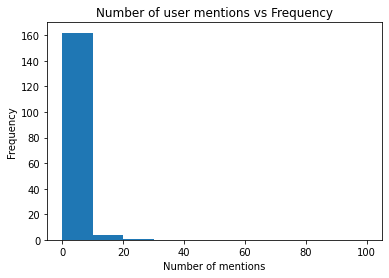

In [22]:
bins=[0, 10, 20, 30, 40, 50, 100]
number_of_mentions = [value for value in sorted_users.values()]
print(number_of_mentions)
plt.hist(number_of_mentions, bins=bins)
plt.title("Number of user mentions vs Frequency")
plt.xlabel('Number of mentions')
plt.ylabel('Frequency')
plt.show()


 ** (optional task for fun) Getting "All" friends (followees) and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [35]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary







*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

** How to submit: **

        Please submit through Canvas, in the Assignment "HW1".
        